In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch

In [2]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
x_test= x_test/255
x_train = x_train/255

In [5]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [6]:

XX=np.split(x_train,[8000,19000,20000,23000,24500,28000,30000,35000,44400])
YY=np.split(y_train,[8000,19000,20000,23000,24500,28000,30000,35000,44400])
YYY=np.array(YY)
XXX=np.array(XX)
XXX[0].shape

<ipython-input-6-491c0b00a0c6>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  YYY=np.array(YY)
<ipython-input-6-491c0b00a0c6>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  XXX=np.array(XX)


(8000, 32, 32, 3)

In [ ]:
from keras import layers
model = tf.keras.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 

model.add(layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))


#model.add(layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        2064      
                                                                 
 flatten_2 (Flatten)         (None, 16384)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               4194560   
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 4,265,402
Trainable params: 4,265,402
No

In [ ]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
def avg_w_co(a,XXX,n):
  w=np.zeros(np.array(a[0]).shape)
  for i in range(10):
    wi=XXX[i].shape[0]/(50000)
    w= w+(wi)*np.array(a[i])
  w=list(w)
  print(n+1,'\n','_________________________')
  return w


In [ ]:
loss=np.zeros([10,40])
loss_val=np.zeros([10,40])
acc=np.zeros([10,40])
acc_val=np.zeros([10,40])
a=[]
for i in range(10):
  import datetime as dt
  t0_relu = dt.datetime.now()
  train_model = model.fit(XXX[i],YYY[i],epochs=1, validation_split=0.2,batch_size=512)
  loss[i,0]=np.array(train_model.history['loss'])
  loss_val[i,0]=np.array(train_model.history['val_loss'])
  acc[i,0]=np.array(train_model.history['accuracy'])
  acc_val[i,0]=np.array(train_model.history['val_accuracy'])
  a+=[model.get_weights()]
  t1_relu = dt.datetime.now()
  print(t1_relu-t0_relu)
for n in range(39):
  w = avg_w_co(a,XXX,n)
  a=[]
  for i in range(10):
    model.set_weights(w)
    t0_relu = dt.datetime.now()
    train_model = model.fit(XXX[i],YYY[i],epochs=1, validation_split=0.2,batch_size=512)
    loss[i,n+1]=np.array(train_model.history['loss'])
    loss_val[i,n+1]=np.array(train_model.history['val_loss'])
    acc[i,n+1]=np.array(train_model.history['accuracy'])
    acc_val[i,n+1]=np.array(train_model.history['val_accuracy'])
    a+=[model.get_weights()]
    t1_relu = dt.datetime.now()
    print(t1_relu-t0_relu)

13/13 [==============================] - 13s 985ms/step - loss: 0.0076 - accuracy: 0.9998 - val_loss: 0.0589 - val_accuracy: 0.9819
0:00:13.012369
18/18 [==============================] - 18s 976ms/step - loss: 0.0146 - accuracy: 0.9984 - val_loss: 0.0985 - val_accuracy: 0.9645
0:00:17.710136
2/2 [==============================] - 2s 707ms/step - loss: 0.0411 - accuracy: 0.9912 - val_loss: 0.1140 - val_accuracy: 0.9800
0:00:02.608810
5/5 [==============================] - 5s 932ms/step - loss: 0.0780 - accuracy: 0.9729 - val_loss: 0.1660 - val_accuracy: 0.9350
0:00:05.208107
3/3 [==============================] - 2s 732ms/step - loss: 0.1713 - accuracy: 0.9425 - val_loss: 0.1494 - val_accuracy: 0.9433
0:00:02.619728
6/6 [==============================] - 6s 929ms/step - loss: 0.1863 - accuracy: 0.9364 - val_loss: 0.2580 - val_accuracy: 0.8971
0:00:10.323670
4/4 [==============================] - 3s 761ms/step - loss: 0.2419 - accuracy: 0.9344 - val_loss: 0.5754 - val_accuracy: 0.8175
0

<ipython-input-22-03286fc1d18e>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w=np.zeros(np.array(a[0]).shape)
<ipython-input-22-03286fc1d18e>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w= w+(wi)*np.array(a[i])


13/13 [==============================] - 12s 940ms/step - loss: 0.0476 - accuracy: 0.9869 - val_loss: 0.1669 - val_accuracy: 0.9419
0:00:20.599860
18/18 [==============================] - 17s 932ms/step - loss: 0.0266 - accuracy: 0.9962 - val_loss: 0.0717 - val_accuracy: 0.9786
0:00:20.605466
2/2 [==============================] - 2s 707ms/step - loss: 0.0335 - accuracy: 0.9950 - val_loss: 0.0775 - val_accuracy: 0.9900
0:00:01.691419
5/5 [==============================] - 5s 921ms/step - loss: 0.0381 - accuracy: 0.9912 - val_loss: 0.0997 - val_accuracy: 0.9650
0:00:05.187657
3/3 [==============================] - 2s 724ms/step - loss: 0.0324 - accuracy: 0.9917 - val_loss: 0.0764 - val_accuracy: 0.9700
0:00:02.471513
6/6 [==============================] - 5s 897ms/step - loss: 0.0263 - accuracy: 0.9961 - val_loss: 0.0870 - val_accuracy: 0.9714
0:00:10.311450
4/4 [==============================] - 3s 737ms/step - loss: 0.0243 - accuracy: 0.9975 - val_loss: 0.0697 - val_accuracy: 0.9750
0

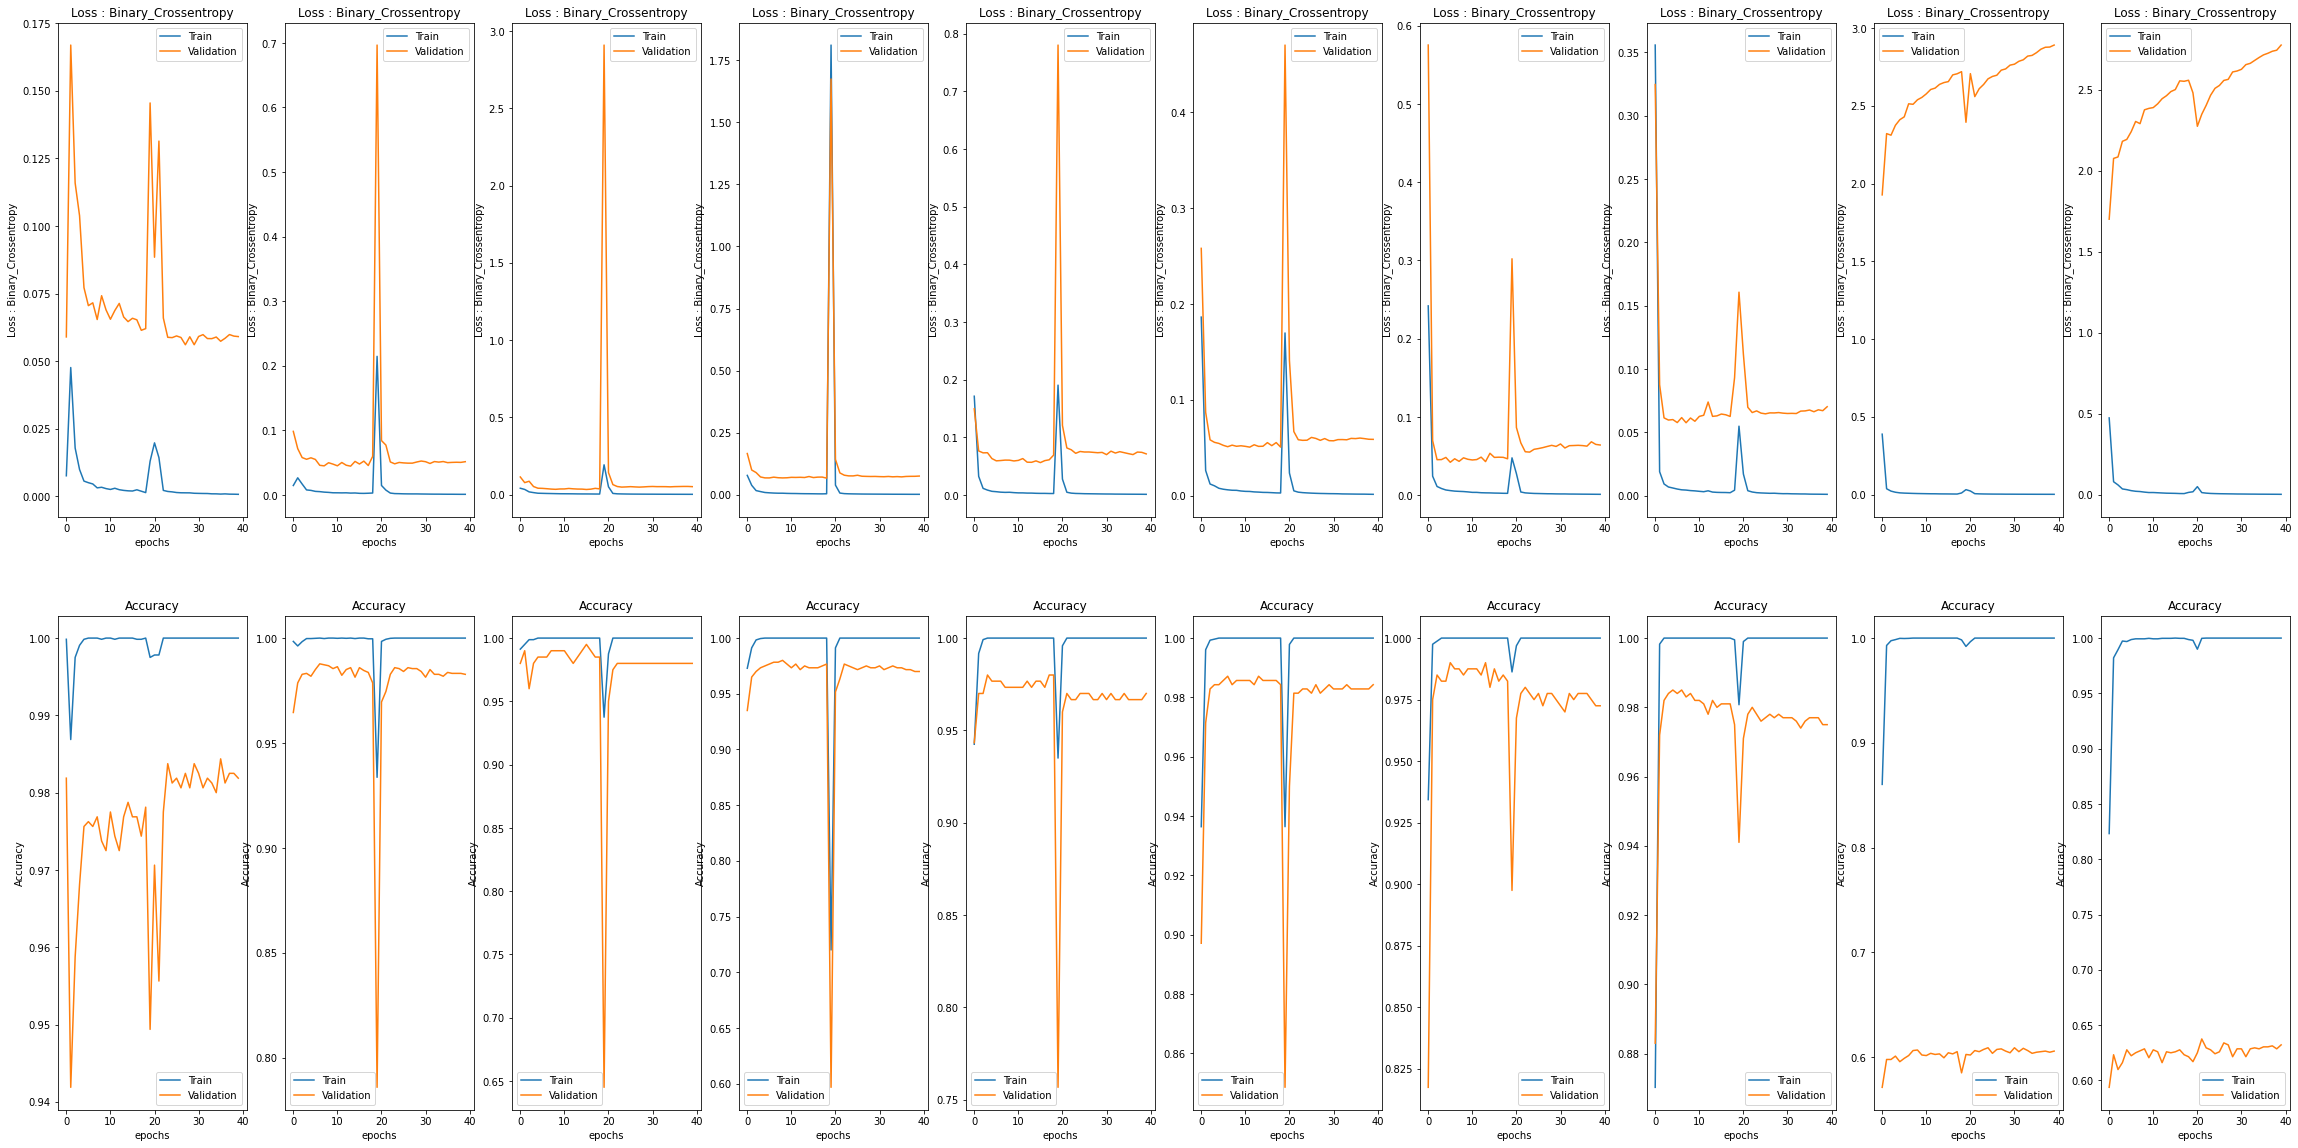

313/313 [==============================] - 8s 25ms/step - loss: 2.7987 - accuracy: 0.6203
2.798684597015381
0.6202999949455261


In [ ]:
f = plt.figure()
f.set_figwidth(20/.5)
f.set_figheight(10/.5)
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.plot(loss[i])
  plt.plot(loss_val[i])
  plt.xlabel('epochs')
  plt.ylabel('Loss : Binary_Crossentropy')
  plt.title('Loss : Binary_Crossentropy')
  plt.legend(['Train', 'Validation'])
  plt.subplot(2,10,i+11)
  plt.plot(acc[i])
  plt.plot(acc_val[i])
  plt.xlabel('epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Train', 'Validation'])
plt.show()
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)

In [ ]:
t0_relu = dt.datetime.now()
train_model1 = model.fit(x_train,y_train,epochs=40, validation_split=0.2,batch_size=512)
t1_relu = dt.datetime.now()
print(t1_relu-t0_relu)

Epoch 1/40
79/79 [==============================] - 80s 1s/step - loss: 0.3622 - accuracy: 0.8821 - val_loss: 0.6523 - val_accuracy: 0.8006
Epoch 2/40
79/79 [==============================] - 84s 1s/step - loss: 0.1832 - accuracy: 0.9371 - val_loss: 0.7534 - val_accuracy: 0.7930
Epoch 3/40
79/79 [==============================] - 79s 1s/step - loss: 0.0657 - accuracy: 0.9805 - val_loss: 0.7543 - val_accuracy: 0.8100
Epoch 4/40
79/79 [==============================] - 79s 995ms/step - loss: 0.0333 - accuracy: 0.9922 - val_loss: 0.7957 - val_accuracy: 0.8164
Epoch 5/40
79/79 [==============================] - 79s 1s/step - loss: 0.0151 - accuracy: 0.9977 - val_loss: 0.8409 - val_accuracy: 0.8152
Epoch 6/40
79/79 [==============================] - 80s 1s/step - loss: 0.0095 - accuracy: 0.9985 - val_loss: 0.8728 - val_accuracy: 0.8090
Epoch 7/40
79/79 [==============================] - 80s 1s/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 0.8872 - val_accuracy: 0.8149
Epoch 8/40
79/79 

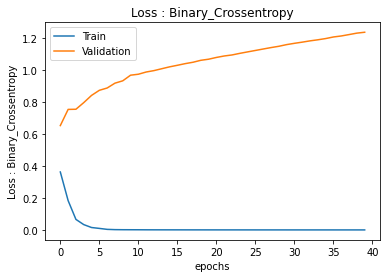

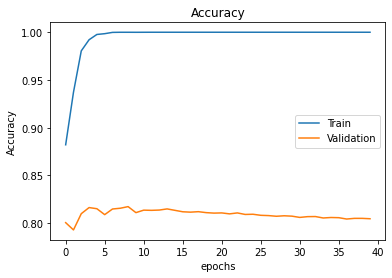

313/313 [==============================] - 7s 22ms/step - loss: 4.0433 - accuracy: 0.6072
4.043290138244629
0.607200026512146


In [ ]:
plt.plot(train_model1.history['loss'])
plt.plot(train_model1.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1.history['accuracy'])
plt.plot(train_model1.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)

In [ ]:

XX=np.split(x_train,10)
YY=np.split(y_train,10)
YYY2=np.array(YY)
XXX2=np.array(XX)
YYY2.shape

(10, 5000, 10)

In [ ]:
loss2=np.zeros([10,40])
loss_val2=np.zeros([10,40])
acc2=np.zeros([10,40])
acc_val2=np.zeros([10,40])
a=[]
for i in range(10):
  import datetime as dt
  t0_relu = dt.datetime.now()
  train_model = model.fit(XXX2[i],YYY2[i],epochs=1, validation_split=0.2,batch_size=512)
  loss2[i,0]=np.array(train_model.history['loss'])
  loss_val2[i,0]=np.array(train_model.history['val_loss'])
  acc2[i,0]=np.array(train_model.history['accuracy'])
  acc_val2[i,0]=np.array(train_model.history['val_accuracy'])
  a+=[model.get_weights()]
  t1_relu = dt.datetime.now()
  print(t1_relu-t0_relu)
for n in range(39):
  w = avg_w_co(a,XXX2,n)
  a=[]
  for i in range(10):
    model.set_weights(w)
    t0_relu = dt.datetime.now()
    train_model = model.fit(XXX2[i],YYY2[i],epochs=1, validation_split=0.2,batch_size=512)
    loss2[i,n+1]=np.array(train_model.history['loss'])
    loss_val2[i,n+1]=np.array(train_model.history['val_loss'])
    acc2[i,n+1]=np.array(train_model.history['accuracy'])
    acc_val2[i,n+1]=np.array(train_model.history['val_accuracy'])
    a+=[model.get_weights()]
    t1_relu = dt.datetime.now()
    print(t1_relu-t0_relu)

8/8 [==============================] - 8s 996ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.4632e-04 - val_accuracy: 1.0000
0:00:08.288093
8/8 [==============================] - 8s 973ms/step - loss: 0.2154 - accuracy: 0.9473 - val_loss: 4.2700 - val_accuracy: 0.5900
0:00:07.936246
8/8 [==============================] - 8s 968ms/step - loss: 3.2797 - accuracy: 0.4363 - val_loss: 1.8522 - val_accuracy: 0.3660
0:00:10.339452
8/8 [==============================] - 8s 971ms/step - loss: 1.8605 - accuracy: 0.3550 - val_loss: 1.8092 - val_accuracy: 0.3740
0:00:10.303908
8/8 [==============================] - 8s 1s/step - loss: 1.7056 - accuracy: 0.4110 - val_loss: 1.5782 - val_accuracy: 0.4570
0:00:08.600791
8/8 [==============================] - 10s 1s/step - loss: 1.5179 - accuracy: 0.4705 - val_loss: 1.4537 - val_accuracy: 0.4640
0:00:20.548630
8/8 [==============================] - 8s 983ms/step - loss: 1.4363 - accuracy: 0.5020 - val_loss: 1.3012 - val_accuracy: 0.5390
0:00:10.

<ipython-input-22-03286fc1d18e>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w=np.zeros(np.array(a[0]).shape)
<ipython-input-22-03286fc1d18e>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w= w+(wi)*np.array(a[i])


8/8 [==============================] - 8s 979ms/step - loss: 1.2061 - accuracy: 0.5742 - val_loss: 1.1286 - val_accuracy: 0.6100
0:00:07.872692
8/8 [==============================] - 8s 988ms/step - loss: 1.1494 - accuracy: 0.5928 - val_loss: 1.0396 - val_accuracy: 0.6380
0:00:07.972793
8/8 [==============================] - 8s 967ms/step - loss: 1.0623 - accuracy: 0.6405 - val_loss: 1.1526 - val_accuracy: 0.5840
0:00:07.769223
8/8 [==============================] - 8s 964ms/step - loss: 1.1359 - accuracy: 0.5987 - val_loss: 1.1518 - val_accuracy: 0.6020
0:00:07.755290
8/8 [==============================] - 8s 969ms/step - loss: 1.1270 - accuracy: 0.5972 - val_loss: 1.0921 - val_accuracy: 0.6020
0:00:10.307187
8/8 [==============================] - 8s 985ms/step - loss: 1.0665 - accuracy: 0.6248 - val_loss: 1.0919 - val_accuracy: 0.6000
0:00:10.338874
8/8 [==============================] - 8s 969ms/step - loss: 1.1012 - accuracy: 0.6180 - val_loss: 1.1503 - val_accuracy: 0.5890
0:00:07

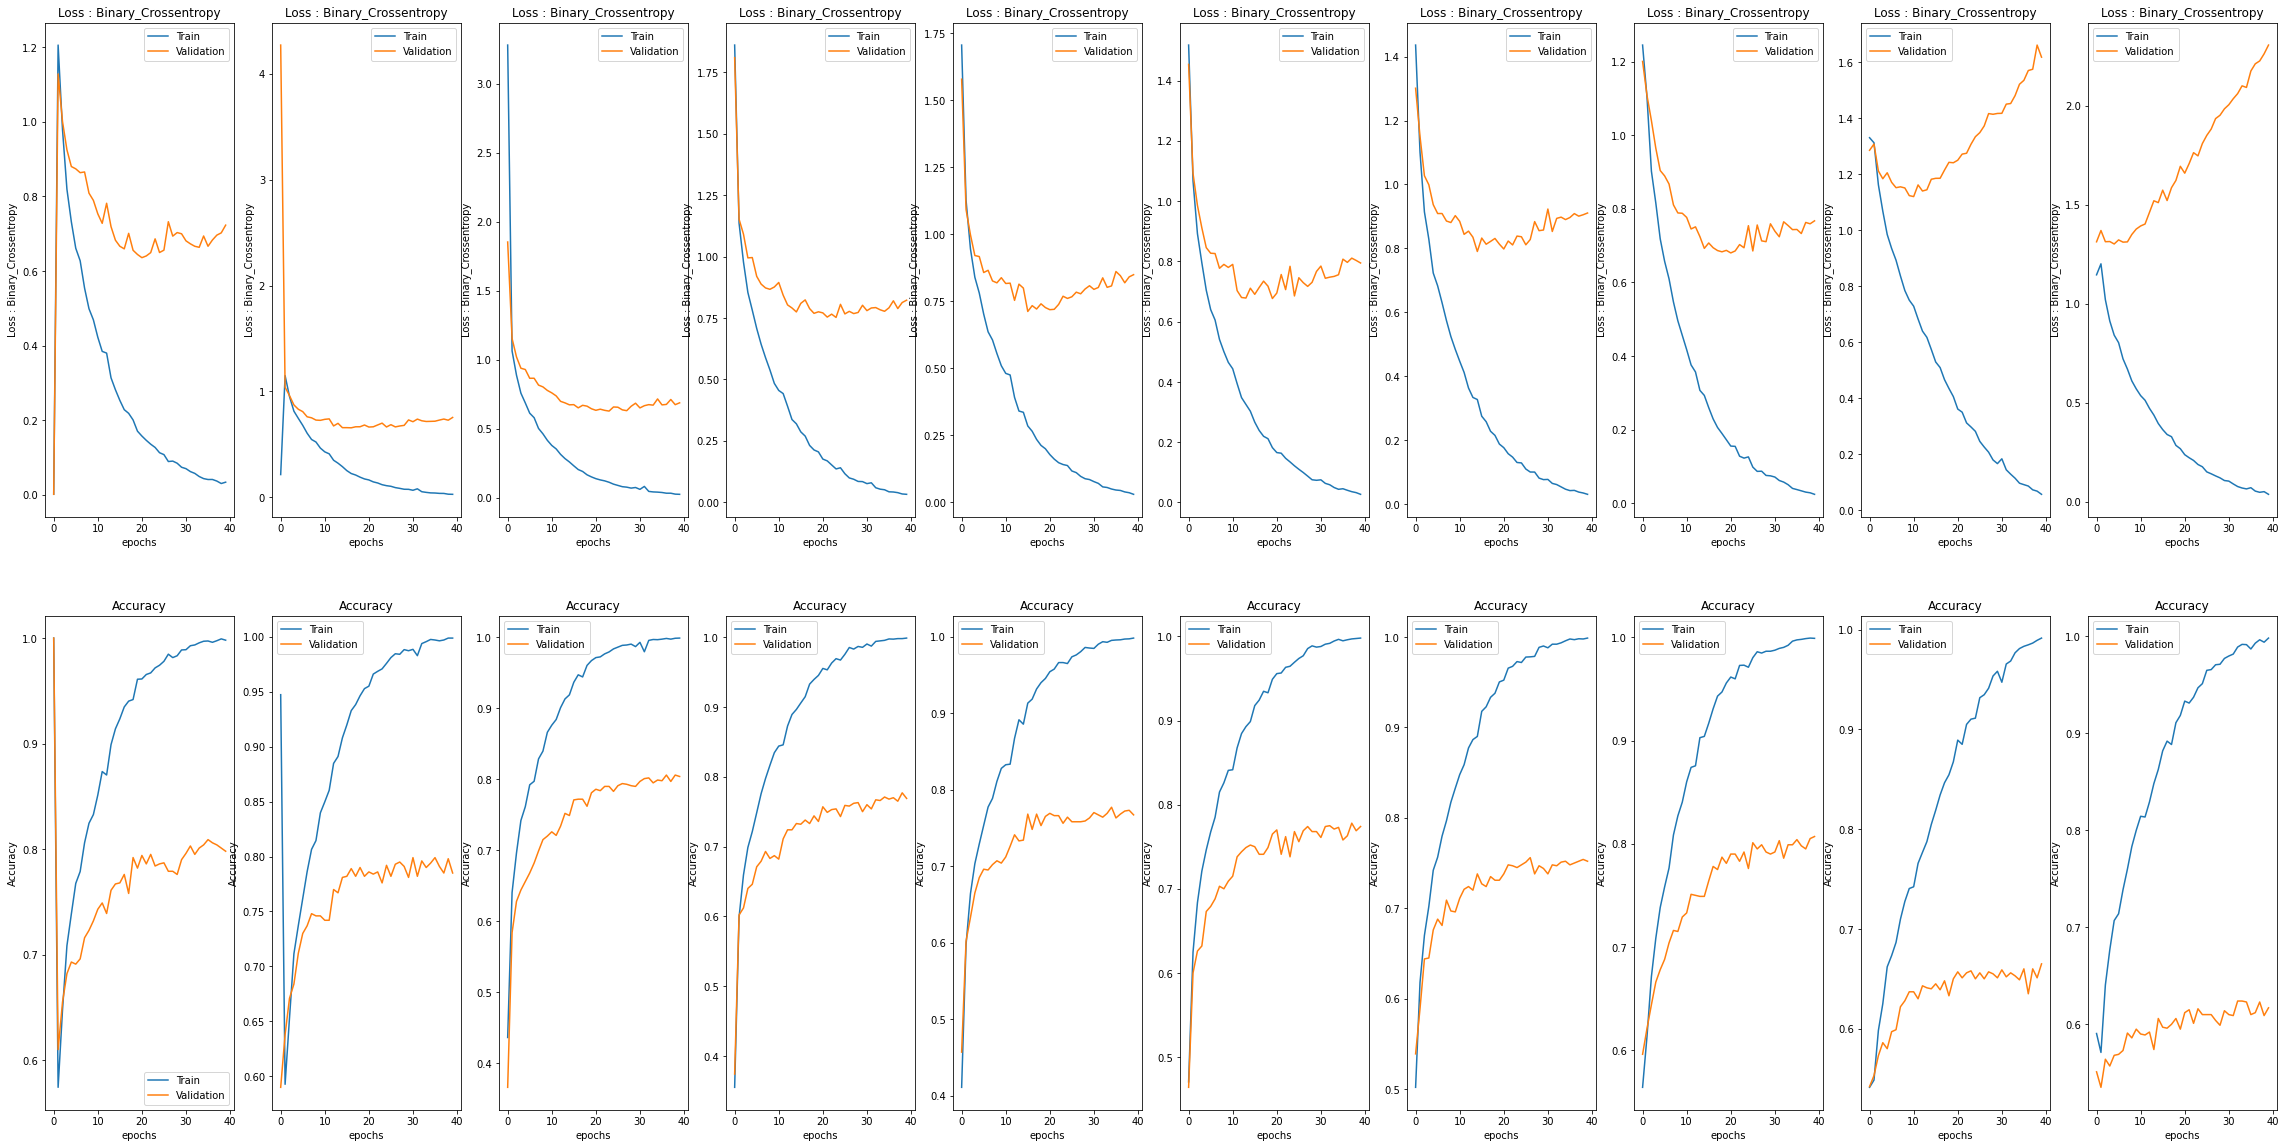

313/313 [==============================] - 7s 23ms/step - loss: 2.4712 - accuracy: 0.5740
2.4712417125701904
0.5740000009536743


In [ ]:
f = plt.figure()
f.set_figwidth(20/.5)
f.set_figheight(10/.5)
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.plot(loss2[i])
  plt.plot(loss_val2[i])
  plt.xlabel('epochs')
  plt.ylabel('Loss : Binary_Crossentropy')
  plt.title('Loss : Binary_Crossentropy')
  plt.legend(['Train', 'Validation'])
  plt.subplot(2,10,i+11)
  plt.plot(acc2[i])
  plt.plot(acc_val2[i])
  plt.xlabel('epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Train', 'Validation'])
plt.show()
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)

In [ ]:
from keras import layers
model2=[0,0,0,0,0,0,0,0,0,0]
for i in range(10):
  model2[i] = tf.keras.Sequential()
  model2[i].add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 

  model2[i].add(layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))


  #model.add(layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))

  model2[i].add(layers.Flatten())
  model2[i].add(layers.Dense(256, activation='relu'))
  model2[i].add(layers.Dense(256, activation='relu'))

  model2[i].add(layers.Dense(10, activation='softmax'))

  model2[i].summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 conv2d_47 (Conv2D)          (None, 32, 32, 16)        2064      
                                                                 
 flatten_23 (Flatten)        (None, 16384)             0         
                                                                 
 dense_69 (Dense)            (None, 256)               4194560   
                                                                 
 dense_70 (Dense)            (None, 256)               65792     
                                                                 
 dense_71 (Dense)            (None, 10)                2570      
                                                                 
Total params: 4,265,402
Trainable params: 4,265,402
N

In [ ]:
for i in range(10):
  def my_loss_fn(y_true, y_pred):
    y=np.array([])
    for i in range(10):
      x=np.square(np.array(w[i]).reshape([w[i].size])-np.array(a[i][i]).reshape([w[i].size]))
      y=np.concatenate((y, x))
    z=np.zeros([10])
    z[0]=y.mean()
    squared_difference = tf.square(y_true - y_pred)+ torch.Tensor(z)
    #print(tf.square(y_true - y_pred)+ torch.Tensor(z))
    return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`
  model2[i].compile(loss=my_loss_fn,
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
loss=np.zeros([10,60])
loss_val=np.zeros([10,60])
acc=np.zeros([10,60])
acc_val=np.zeros([10,60])
a=[0,0,0,0,0,0,0,0,0,0]
for i in range(10):
  a[i]=model2[i].get_weights()
w = avg_w_co(a,XXX,-1) 
for i in range(10):
  import datetime as dt
  t0_relu = dt.datetime.now() 
  train_model2 = model2[i].fit(XXX[i],YYY[i],epochs=1, validation_split=0.2,batch_size=512)
  loss[i,0]=np.array(train_model2.history['loss'])
  loss_val[i,0]=np.array(train_model2.history['val_loss'])
  acc[i,0]=np.array(train_model2.history['accuracy'])
  acc_val[i,0]=np.array(train_model2.history['val_accuracy'])
  a[i]=model2[i].get_weights()
  t1_relu = dt.datetime.now()
  print(t1_relu-t0_relu)
for n in range(59):
  w = avg_w_co(a,XXX,n)
  for i in range(10):
    model2[i].set_weights(w)
    t0_relu = dt.datetime.now()
    train_model2 = model2[i].fit(XXX[i],YYY[i],epochs=1, validation_split=0.2,batch_size=512)
    loss[i,n+1]=np.array(train_model2.history['loss'])
    loss_val[i,n+1]=np.array(train_model2.history['val_loss'])
    acc[i,n+1]=np.array(train_model2.history['accuracy'])
    acc_val[i,n+1]=np.array(train_model2.history['val_accuracy'])
    a[i]=model2[i].get_weights()
    t1_relu = dt.datetime.now()
    print(t1_relu-t0_relu)

<ipython-input-12-03286fc1d18e>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w=np.zeros(np.array(a[0]).shape)
<ipython-input-12-03286fc1d18e>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w= w+(wi)*np.array(a[i])


0 
 _________________________
13/13 [==============================] - 11s 760ms/step - loss: 0.0877 - accuracy: 0.1777 - val_loss: 0.0834 - val_accuracy: 0.2713
0:00:10.808418
18/18 [==============================] - 14s 747ms/step - loss: 0.0872 - accuracy: 0.1937 - val_loss: 0.0828 - val_accuracy: 0.2868
0:00:14.271321
2/2 [==============================] - 2s 680ms/step - loss: 0.0918 - accuracy: 0.0850 - val_loss: 0.0931 - val_accuracy: 0.1500
0:00:01.928344
5/5 [==============================] - 4s 744ms/step - loss: 0.0904 - accuracy: 0.1171 - val_loss: 0.0893 - val_accuracy: 0.1300
0:00:04.253478
3/3 [==============================] - 2s 587ms/step - loss: 0.0903 - accuracy: 0.1100 - val_loss: 0.0890 - val_accuracy: 0.1367
0:00:02.435510
6/6 [==============================] - 5s 699ms/step - loss: 0.0960 - accuracy: 0.1157 - val_loss: 0.0956 - val_accuracy: 0.1014
0:00:04.968377
4/4 [==============================] - 3s 604ms/step - loss: 0.0896 - accuracy: 0.1094 - val_loss: 0

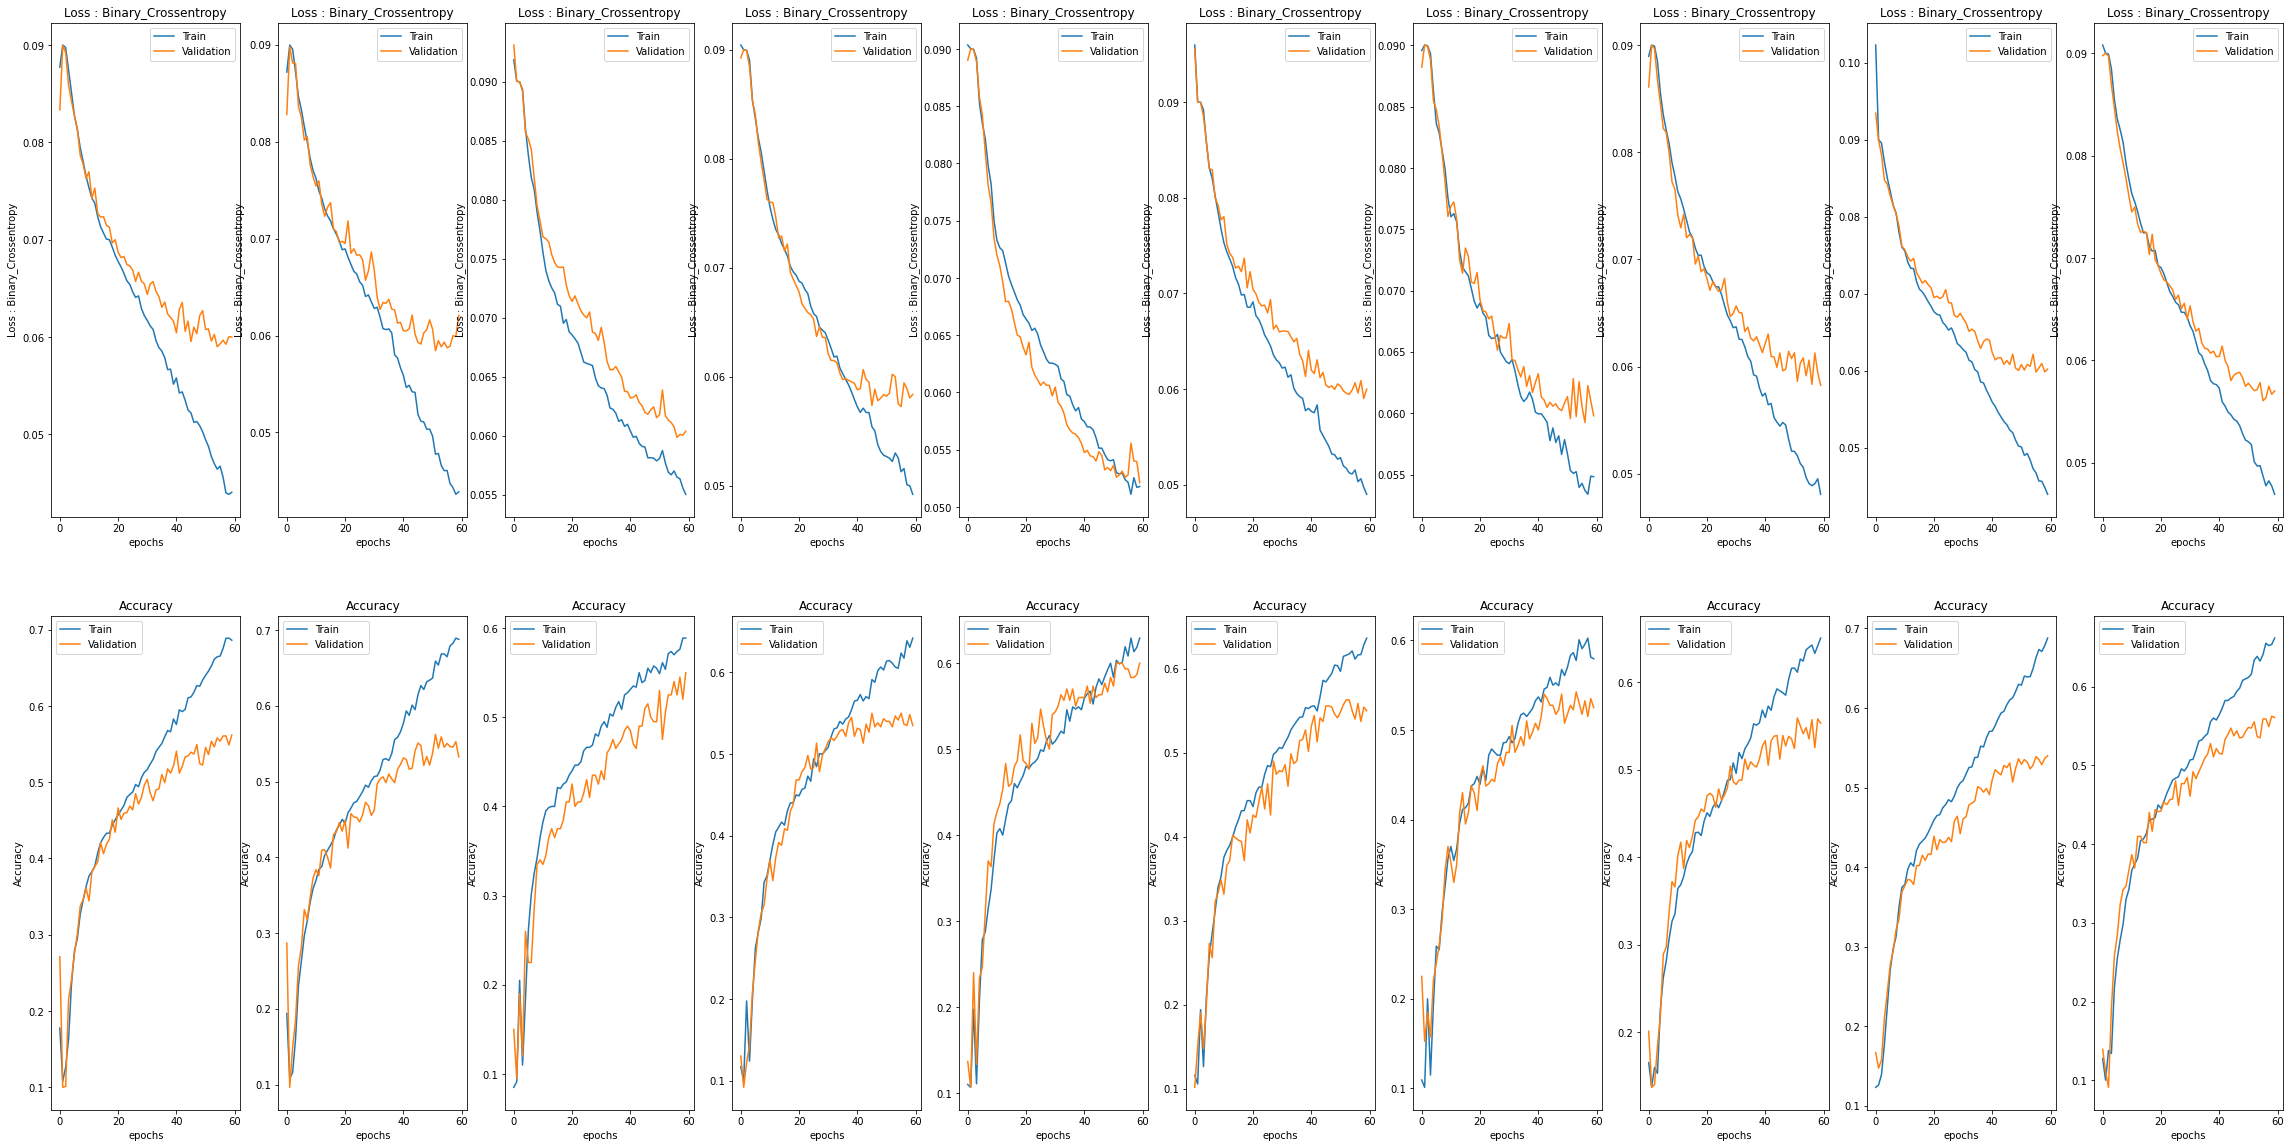

313/313 [==============================] - 5s 16ms/step - loss: 0.0596 - accuracy: 0.5530
0.059558168053627014
0.5529999732971191
313/313 [==============================] - 4s 14ms/step - loss: 0.0624 - accuracy: 0.5226
0.06240663304924965
0.522599995136261
313/313 [==============================] - 4s 14ms/step - loss: 0.0601 - accuracy: 0.5419
0.06005679443478584
0.5418999791145325
313/313 [==============================] - 4s 14ms/step - loss: 0.0590 - accuracy: 0.5525
0.05900483950972557
0.5525000095367432
313/313 [==============================] - 4s 14ms/step - loss: 0.0588 - accuracy: 0.5509
0.05882319435477257
0.5508999824523926
313/313 [==============================] - 4s 14ms/step - loss: 0.0579 - accuracy: 0.5600
0.05791965872049332
0.5600000023841858
313/313 [==============================] - 4s 14ms/step - loss: 0.0596 - accuracy: 0.5470
0.05957331508398056
0.546999990940094
313/313 [==============================] - 4s 14ms/step - loss: 0.0578 - accuracy: 0.5615
0.057784

In [ ]:
f = plt.figure()
f.set_figwidth(20/.5)
f.set_figheight(10/.5)
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.plot(loss[i])
  plt.plot(loss_val[i])
  plt.xlabel('epochs')
  plt.ylabel('Loss : Binary_Crossentropy')
  plt.title('Loss : Binary_Crossentropy')
  plt.legend(['Train', 'Validation'])
  plt.subplot(2,10,i+11)
  plt.plot(acc[i])
  plt.plot(acc_val[i])
  plt.xlabel('epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Train', 'Validation'])
plt.show()
for i in range(10):
  test_loss,test_accuracy = model2[i].evaluate(x_test,y_test)
  print(test_loss)
  print(test_accuracy)

In [17]:
from keras import layers
model3=[0,0,0,0,0,0,0,0,0,0]
for i in range(10):
  model3[i] = tf.keras.Sequential()
  model3[i].add(layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 

  model3[i].add(layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))


  #model.add(layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))

  model3[i].add(layers.Flatten())
  model3[i].add(layers.Dense(256, activation='relu'))
  model3[i].add(layers.Dense(256, activation='relu'))

  model3[i].add(layers.Dense(10, activation='softmax'))

  model3[i].summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 16)        2064      
                                                                 
 flatten_10 (Flatten)        (None, 16384)             0         
                                                                 
 dense_30 (Dense)            (None, 256)               4194560   
                                                                 
 dense_31 (Dense)            (None, 256)               65792     
                                                                 
 dense_32 (Dense)            (None, 10)                2570      
                                                                 
Total params: 4,265,402
Trainable params: 4,265,402
N

In [ ]:
for i in range(10):
  def my_loss_fn(y_true, y_pred):
    y=np.array([])
    for i in range(10):
      x=(np.array([1/4]))*np.square(np.array(w[i]).reshape([w[i].size])-np.array(a[i][i]).reshape([w[i].size]))
      y=np.concatenate((y, x))
    z=np.zeros([10])
    z[0]=y.mean()
    squared_difference = tf.square(y_true - y_pred)+ torch.Tensor(z)
    #print(tf.square(y_true - y_pred)+ torch.Tensor(z))
    return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`
  model3[i].compile(loss=my_loss_fn,
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
loss3=np.zeros([10,60])
loss_val3=np.zeros([10,60])
acc3=np.zeros([10,60])
acc_val3=np.zeros([10,60])
a=[0,0,0,0,0,0,0,0,0,0]
for i in range(10):
  a[i]=model3[i].get_weights()
w = avg_w_co(a,XXX,-1) 
for i in range(10):
  import datetime as dt
  t0_relu = dt.datetime.now() 
  train_model3 = model3[i].fit(XXX[i],YYY[i],epochs=1, validation_split=0.2,batch_size=512)
  loss3[i,0]=np.array(train_model3.history['loss'])
  loss_val3[i,0]=np.array(train_model3.history['val_loss'])
  acc3[i,0]=np.array(train_model3.history['accuracy'])
  acc_val3[i,0]=np.array(train_model3.history['val_accuracy'])
  a[i]=model3[i].get_weights()
  t1_relu = dt.datetime.now()
  print(t1_relu-t0_relu)
for n in range(59):
  w = avg_w_co(a,XXX,n)
  for i in range(10):
    model3[i].set_weights(w)
    t0_relu = dt.datetime.now()
    train_model3 = model3[i].fit(XXX[i],YYY[i],epochs=1, validation_split=0.2,batch_size=512)
    loss3[i,n+1]=np.array(train_model3.history['loss'])
    loss_val3[i,n+1]=np.array(train_model3.history['val_loss'])
    acc3[i,n+1]=np.array(train_model3.history['accuracy'])
    acc_val3[i,n+1]=np.array(train_model3.history['val_accuracy'])
    a[i]=model3[i].get_weights()
    t1_relu = dt.datetime.now()
    print(t1_relu-t0_relu)

<ipython-input-11-03286fc1d18e>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w=np.zeros(np.array(a[0]).shape)
<ipython-input-11-03286fc1d18e>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w= w+(wi)*np.array(a[i])


0 
 _________________________
13/13 [==============================] - 14s 998ms/step - loss: 0.0905 - accuracy: 0.1672 - val_loss: 0.0869 - val_accuracy: 0.2219
0:00:13.982131
18/18 [==============================] - 18s 986ms/step - loss: 0.0859 - accuracy: 0.2093 - val_loss: 0.0806 - val_accuracy: 0.3168
0:00:21.299518
2/2 [==============================] - 3s 845ms/step - loss: 0.0911 - accuracy: 0.1013 - val_loss: 0.0931 - val_accuracy: 0.0950
0:00:02.627787
5/5 [==============================] - 6s 978ms/step - loss: 0.0911 - accuracy: 0.1096 - val_loss: 0.0893 - val_accuracy: 0.1267
0:00:06.025022
3/3 [==============================] - ETA: 0s - loss: 0.0926 - accuracy: 0.1250

3/3 [==============================] - 3s 820ms/step - loss: 0.0926 - accuracy: 0.1250 - val_loss: 0.0906 - val_accuracy: 0.1100
0:00:05.947809
6/6 [==============================] - ETA: 0s - loss: 0.0934 - accuracy: 0.1207

6/6 [==============================] - 7s 952ms/step - loss: 0.0934 - accuracy: 0.1207 - val_loss: 0.0915 - val_accuracy: 0.1429
0:00:11.092242
4/4 [==============================] - 4s 842ms/step - loss: 0.0927 - accuracy: 0.1069 - val_loss: 0.0943 - val_accuracy: 0.1025
0:00:05.968293
8/8 [==============================] - 9s 1s/step - loss: 0.1008 - accuracy: 0.1142 - val_loss: 0.1014 - val_accuracy: 0.1630
0:00:11.132649
15/15 [==============================] - 18s 1s/step - loss: 0.0920 - accuracy: 0.1473 - val_loss: 0.0879 - val_accuracy: 0.1723
0:00:21.948435
9/9 [==============================] - 10s 1s/step - loss: 0.0897 - accuracy: 0.1283 - val_loss: 0.0866 - val_accuracy: 0.2241
0:00:10.359727
1 
 _________________________
13/13 [==============================] - 12s 937ms/step - loss: 0.0900 - accuracy: 0.1025 - val_loss: 0.0900 - val_accuracy: 0.0856
0:00:12.472370
18/18 [==============================] - 16s 901ms/step - loss: 0.0900 - accuracy: 0.1036 - val_loss: 0.0900

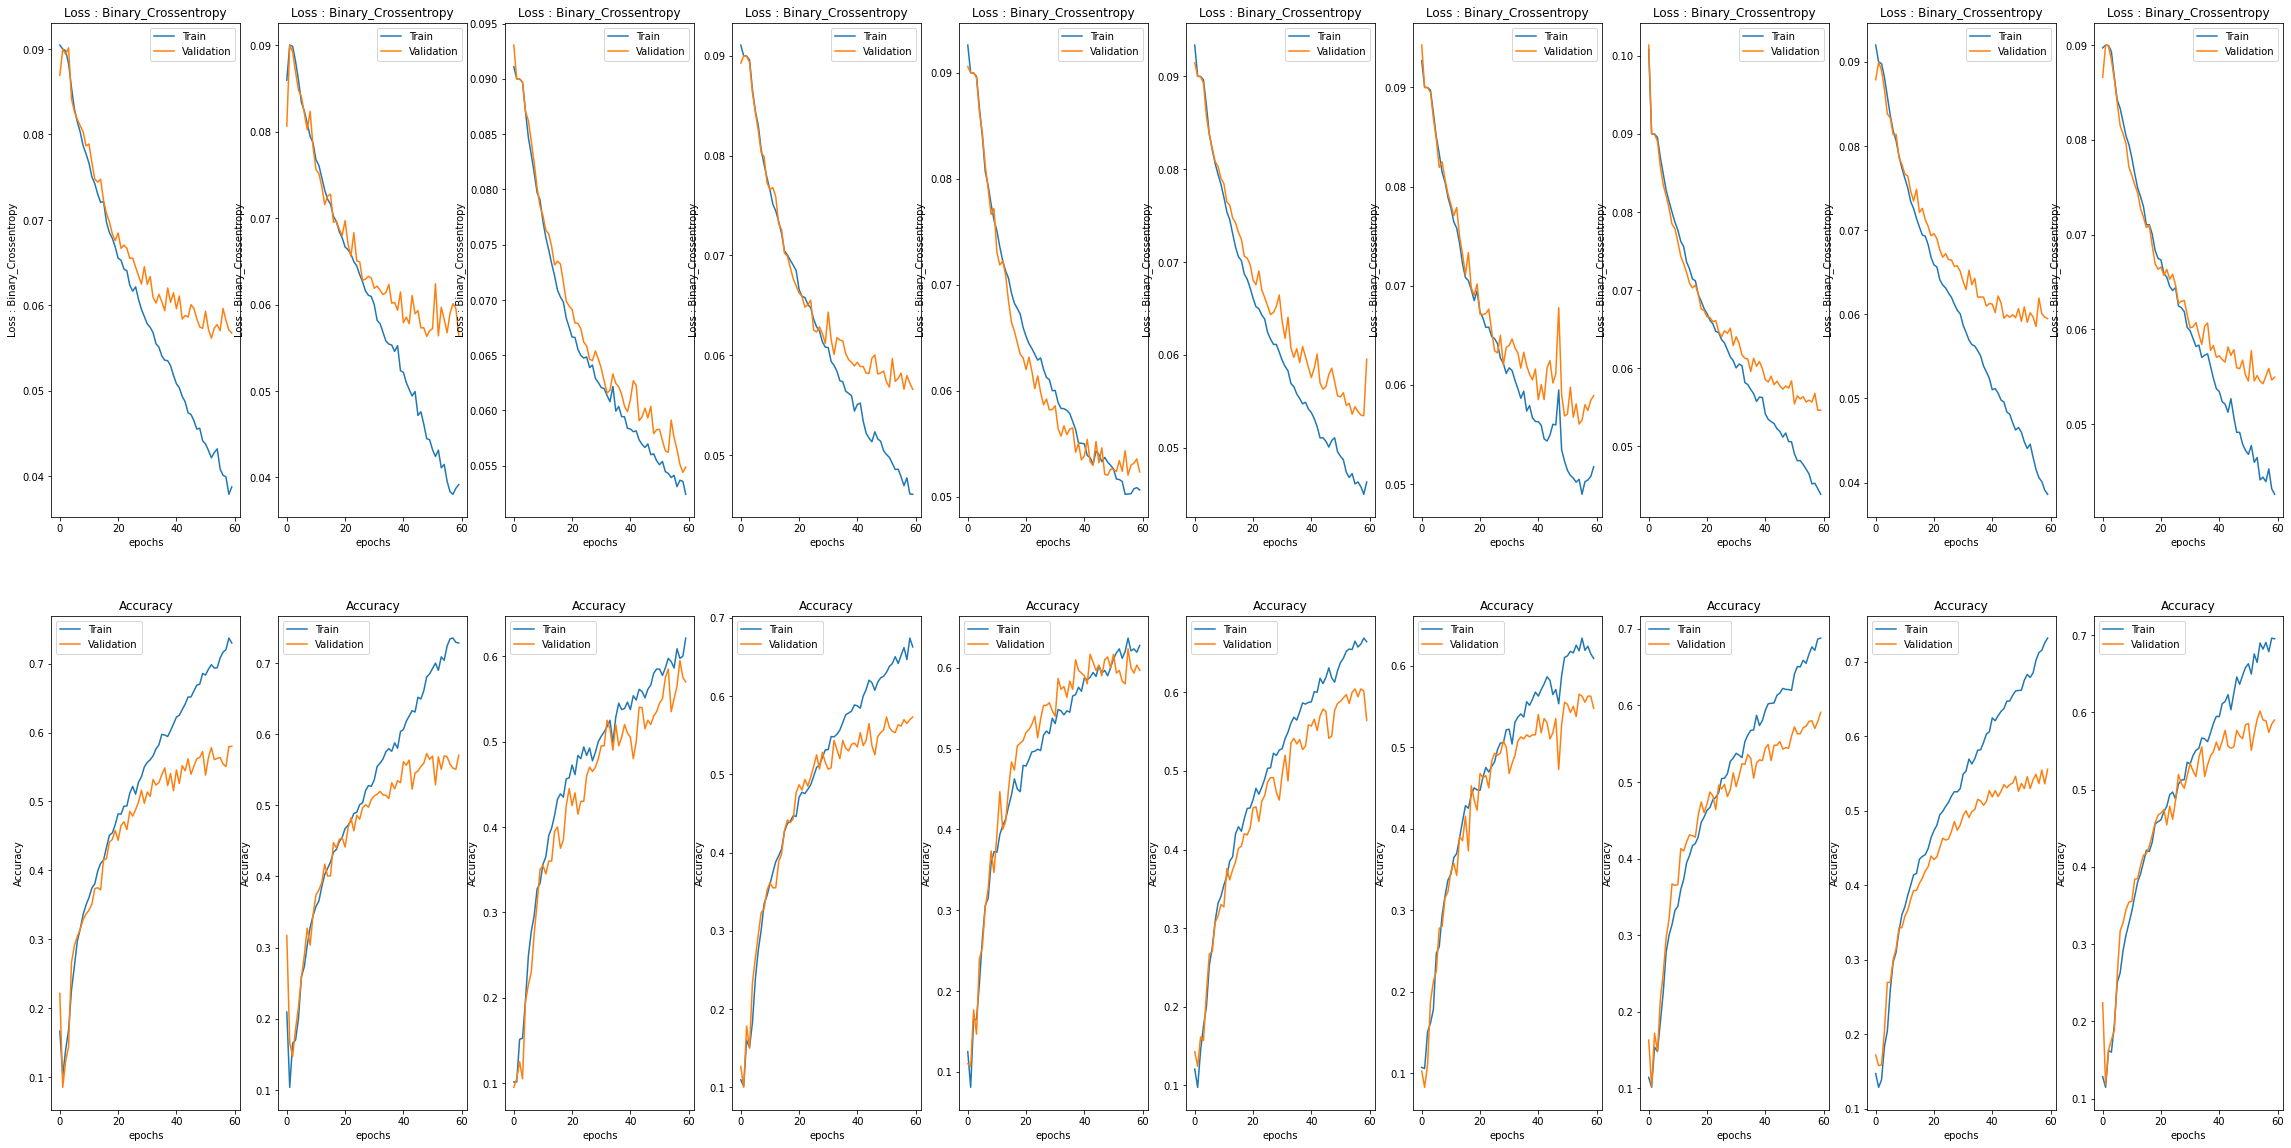

313/313 [==============================] - 7s 21ms/step - loss: 0.0569 - accuracy: 0.5748
0.056939564645290375
0.5748000144958496
313/313 [==============================] - 6s 20ms/step - loss: 0.0563 - accuracy: 0.5779
0.05633481591939926
0.5778999924659729
313/313 [==============================] - 6s 21ms/step - loss: 0.0561 - accuracy: 0.5774
0.056070104241371155
0.5774000287055969
313/313 [==============================] - 6s 20ms/step - loss: 0.0558 - accuracy: 0.5824
0.05579741671681404
0.5824000239372253
313/313 [==============================] - 6s 20ms/step - loss: 0.0557 - accuracy: 0.5809
0.055706512182950974
0.5809000134468079
313/313 [==============================] - 6s 20ms/step - loss: 0.0609 - accuracy: 0.5395
0.06093056499958038
0.5394999980926514
313/313 [==============================] - 6s 20ms/step - loss: 0.0585 - accuracy: 0.5571
0.058537255972623825
0.5570999979972839
313/313 [==============================] - 6s 20ms/step - loss: 0.0550 - accuracy: 0.5899
0.0

In [ ]:
f = plt.figure()
f.set_figwidth(20/.5)
f.set_figheight(10/.5)
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.plot(loss3[i])
  plt.plot(loss_val3[i])
  plt.xlabel('epochs')
  plt.ylabel('Loss : Binary_Crossentropy')
  plt.title('Loss : Binary_Crossentropy')
  plt.legend(['Train', 'Validation'])
  plt.subplot(2,10,i+11)
  plt.plot(acc3[i])
  plt.plot(acc_val3[i])
  plt.xlabel('epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Train', 'Validation'])
plt.show()
for i in range(10):
  test_loss,test_accuracy = model3[i].evaluate(x_test,y_test)
  print(test_loss)
  print(test_accuracy)

In [ ]:
import keras

In [ ]:
for i in range(10):
  def my_loss_fn(y_true, y_pred):
    y=np.array([])
    for i in range(10):
      x=(np.array([1/4]))*np.square(np.array(w[i]).reshape([w[i].size])-np.array(a[i][i]).reshape([w[i].size]))
      y=np.concatenate((y, x))
    z=np.zeros([10])
    z[0]=y.mean()
    squared_difference = tf.square(y_true - y_pred)+ torch.Tensor(z)
    #print(tf.square(y_true - y_pred)+ torch.Tensor(z))
    return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`
  optimizer = keras.optimizers.Adam(learning_rate=1/(n+2))
  model3[i].compile(loss=my_loss_fn,
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
loss3=np.zeros([10,60])
loss_val3=np.zeros([10,60])
acc3=np.zeros([10,60])
acc_val3=np.zeros([10,60])
a=[0,0,0,0,0,0,0,0,0,0]
for i in range(10):
  a[i]=model3[i].get_weights()
n=-1
w = avg_w_co(a,XXX,n) 
for i in range(10):
  import datetime as dt
  t0_relu = dt.datetime.now() 
  train_model3 = model3[i].fit(XXX[i],YYY[i],epochs=1, validation_split=0.2,batch_size=512)
  loss3[i,0]=np.array(train_model3.history['loss'])
  loss_val3[i,0]=np.array(train_model3.history['val_loss'])
  acc3[i,0]=np.array(train_model3.history['accuracy'])
  acc_val3[i,0]=np.array(train_model3.history['val_accuracy'])
  a[i]=model3[i].get_weights()
  t1_relu = dt.datetime.now()
  print(t1_relu-t0_relu)
for n in range(59):
  w = avg_w_co(a,XXX,n)
  for i in range(10):
    model3[i].set_weights(w)
    t0_relu = dt.datetime.now()
    train_model3 = model3[i].fit(XXX[i],YYY[i],epochs=1, validation_split=0.2,batch_size=512)
    loss3[i,n+1]=np.array(train_model3.history['loss'])
    loss_val3[i,n+1]=np.array(train_model3.history['val_loss'])
    acc3[i,n+1]=np.array(train_model3.history['accuracy'])
    acc_val3[i,n+1]=np.array(train_model3.history['val_accuracy'])
    a[i]=model3[i].get_weights()
    t1_relu = dt.datetime.now()
    print(t1_relu-t0_relu)

<ipython-input-11-03286fc1d18e>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w=np.zeros(np.array(a[0]).shape)
<ipython-input-11-03286fc1d18e>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w= w+(wi)*np.array(a[i])


0 
 _________________________
13/13 [==============================] - 13s 907ms/step - loss: 0.1689 - accuracy: 0.1502 - val_loss: 0.1766 - val_accuracy: 0.1169
0:00:21.671986
18/18 [==============================] - 18s 953ms/step - loss: 0.1732 - accuracy: 0.1305 - val_loss: 0.1787 - val_accuracy: 0.1064
0:00:21.323287
2/2 [==============================] - 2s 845ms/step - loss: 0.0922 - accuracy: 0.4825 - val_loss: 0.1820 - val_accuracy: 0.0900
0:00:02.533332
5/5 [==============================] - 5s 937ms/step - loss: 0.1494 - accuracy: 0.2333 - val_loss: 0.1780 - val_accuracy: 0.1100
0:00:05.409496
3/3 [==============================] - 3s 782ms/step - loss: 0.1180 - accuracy: 0.3642 - val_loss: 0.1780 - val_accuracy: 0.1100
0:00:03.211010
6/6 [==============================] - 6s 864ms/step - loss: 0.1559 - accuracy: 0.1993 - val_loss: 0.1797 - val_accuracy: 0.1014
0:00:05.948448
4/4 [==============================] - 4s 768ms/step - loss: 0.1374 - accuracy: 0.2738 - val_loss: 0

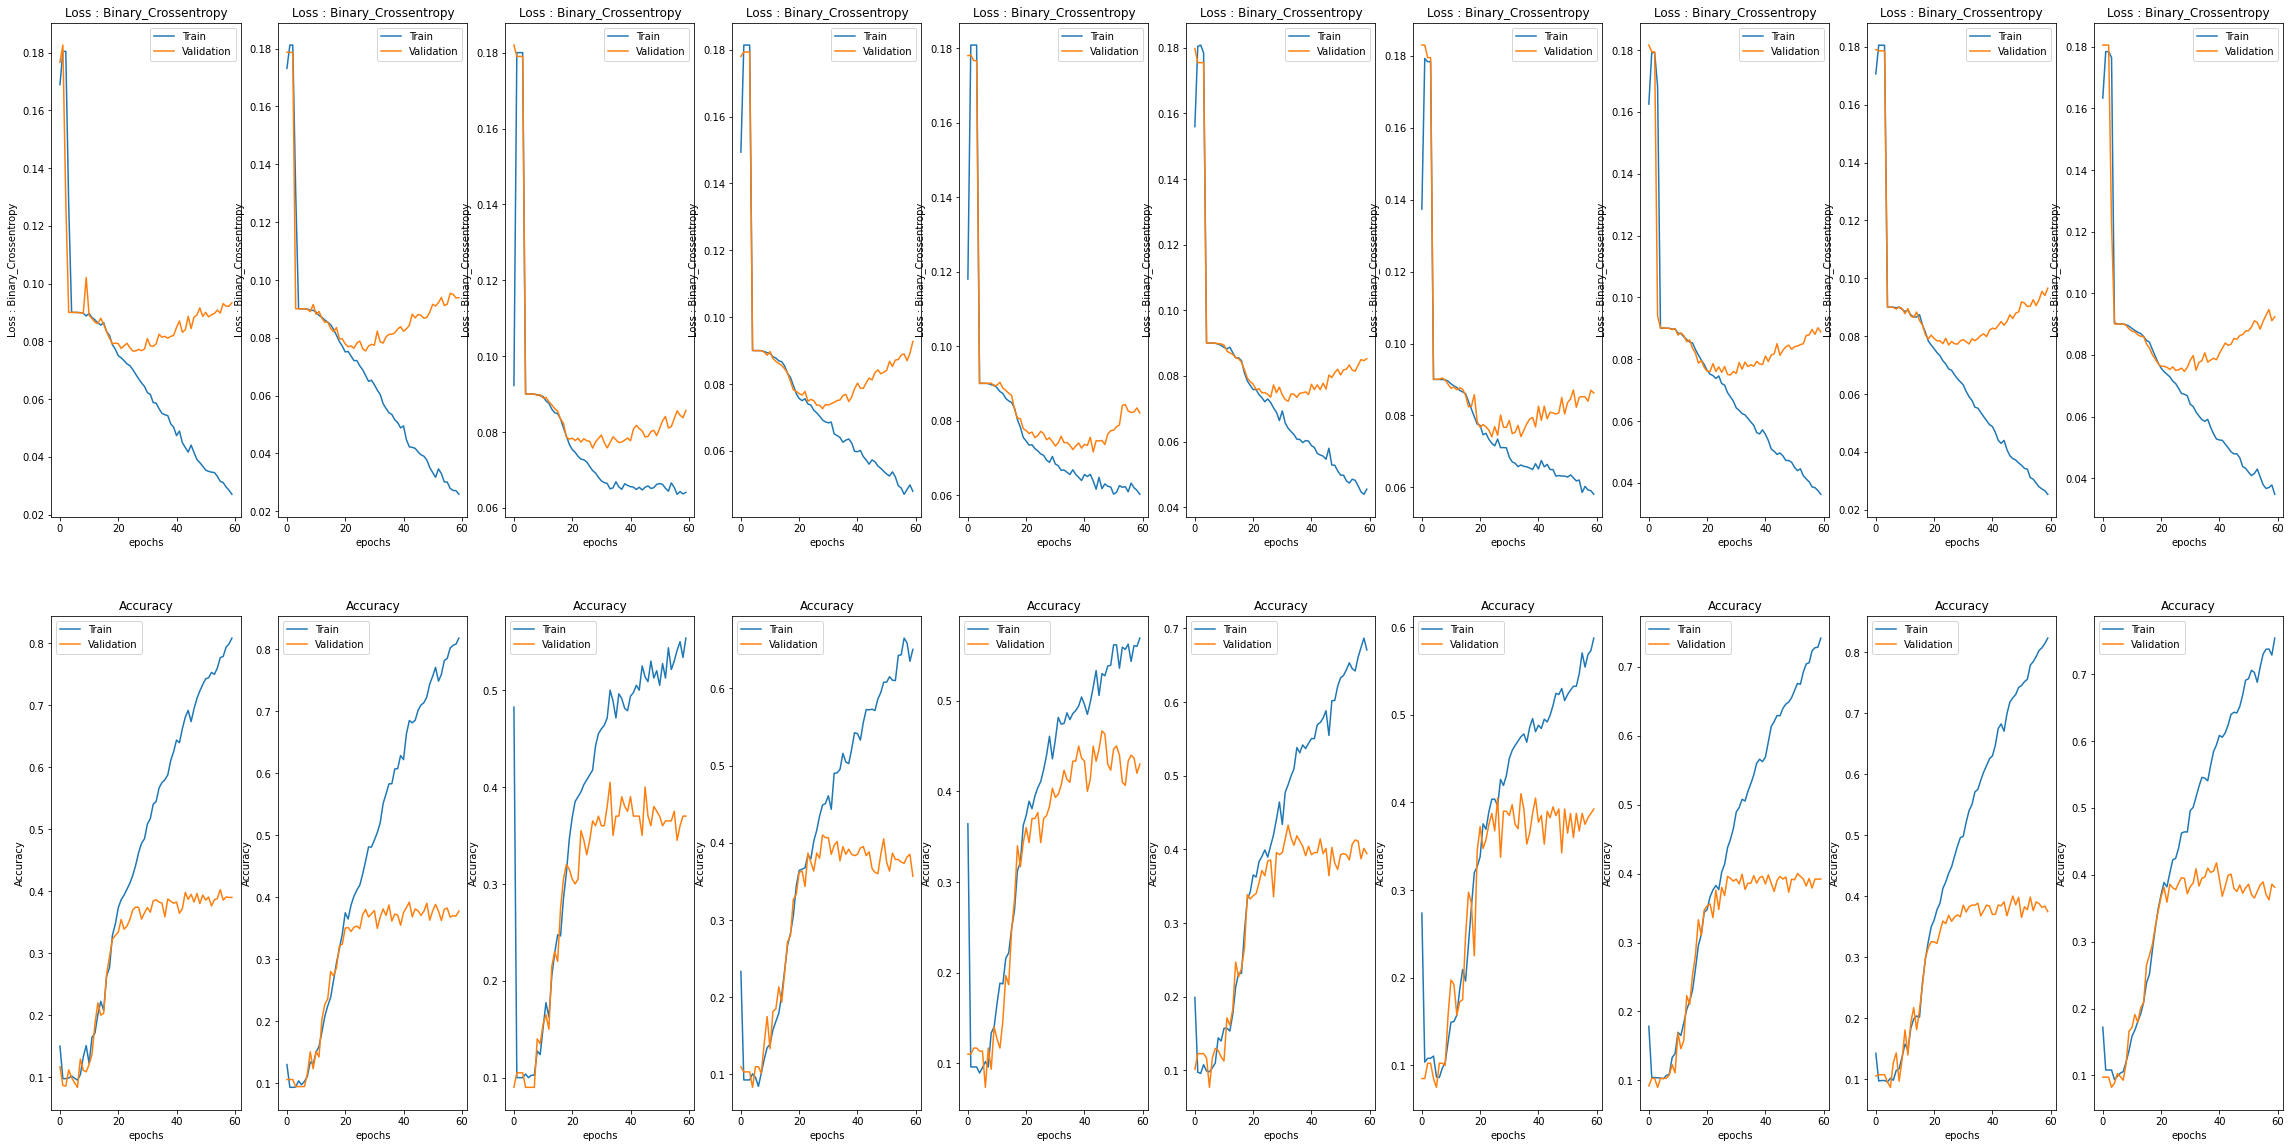

313/313 [==============================] - 6s 20ms/step - loss: 0.0927 - accuracy: 0.3858
0.09266161173582077
0.38580000400543213
313/313 [==============================] - 7s 21ms/step - loss: 0.0945 - accuracy: 0.3822
0.09450939297676086
0.3822000026702881
313/313 [==============================] - 6s 21ms/step - loss: 0.0873 - accuracy: 0.3904
0.08734896034002304
0.3903999924659729
313/313 [==============================] - 6s 20ms/step - loss: 0.0883 - accuracy: 0.3837
0.08827861398458481
0.38370001316070557
313/313 [==============================] - 6s 20ms/step - loss: 0.0875 - accuracy: 0.3851
0.08748962730169296
0.38510000705718994
313/313 [==============================] - 6s 20ms/step - loss: 0.0888 - accuracy: 0.3827
0.08879198879003525
0.38269999623298645
313/313 [==============================] - 6s 20ms/step - loss: 0.0866 - accuracy: 0.3810
0.08663590252399445
0.38100001215934753
313/313 [==============================] - 6s 20ms/step - loss: 0.0913 - accuracy: 0.3838
0.

In [ ]:
f = plt.figure()
f.set_figwidth(20/.5)
f.set_figheight(10/.5)
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.plot(loss3[i])
  plt.plot(loss_val3[i])
  plt.xlabel('epochs')
  plt.ylabel('Loss : Binary_Crossentropy')
  plt.title('Loss : Binary_Crossentropy')
  plt.legend(['Train', 'Validation'])
  plt.subplot(2,10,i+11)
  plt.plot(acc3[i])
  plt.plot(acc_val3[i])
  plt.xlabel('epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Train', 'Validation'])
plt.show()
for i in range(10):
  test_loss,test_accuracy = model3[i].evaluate(x_test,y_test)
  print(test_loss)
  print(test_accuracy)

In [9]:
import math 
import keras

In [ ]:
for i in range(10):
  def my_loss_fn(y_true, y_pred):
    y=np.array([])
    for i in range(10):
      x=(np.array([1/4]))*np.square(np.array(w[i]).reshape([w[i].size])-np.array(a[i][i]).reshape([w[i].size]))
      y=np.concatenate((y, x))
    z=np.zeros([10])
    z[0]=y.mean()
    squared_difference = tf.square(y_true - y_pred)+ torch.Tensor(z)
    #print(tf.square(y_true - y_pred)+ torch.Tensor(z))
    return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`
  optimizer = keras.optimizers.Adam(learning_rate=1/math.sqrt(n+2))
  model3[i].compile(loss=my_loss_fn,
                optimizer=optimizer,
                metrics=['accuracy'])

In [ ]:
loss3=np.zeros([10,60])
loss_val3=np.zeros([10,60])
acc3=np.zeros([10,60])
acc_val3=np.zeros([10,60])
a=[0,0,0,0,0,0,0,0,0,0]
for i in range(10):
  a[i]=model3[i].get_weights()
n=-1
w = avg_w_co(a,XXX,n) 
for i in range(10):
  import datetime as dt
  t0_relu = dt.datetime.now() 
  train_model3 = model3[i].fit(XXX[i],YYY[i],epochs=1, validation_split=0.2,batch_size=512)
  loss3[i,0]=np.array(train_model3.history['loss'])
  loss_val3[i,0]=np.array(train_model3.history['val_loss'])
  acc3[i,0]=np.array(train_model3.history['accuracy'])
  acc_val3[i,0]=np.array(train_model3.history['val_accuracy'])
  a[i]=model3[i].get_weights()
  t1_relu = dt.datetime.now()
  print(t1_relu-t0_relu)
for n in range(59):
  w = avg_w_co(a,XXX,n)
  for i in range(10):
    model3[i].set_weights(w)
    t0_relu = dt.datetime.now()
    train_model3 = model3[i].fit(XXX[i],YYY[i],epochs=1, validation_split=0.2,batch_size=512)
    loss3[i,n+1]=np.array(train_model3.history['loss'])
    loss_val3[i,n+1]=np.array(train_model3.history['val_loss'])
    acc3[i,n+1]=np.array(train_model3.history['accuracy'])
    acc_val3[i,n+1]=np.array(train_model3.history['val_accuracy'])
    a[i]=model3[i].get_weights()
    t1_relu = dt.datetime.now()
    print(t1_relu-t0_relu)

<ipython-input-8-03286fc1d18e>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w=np.zeros(np.array(a[0]).shape)
<ipython-input-8-03286fc1d18e>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w= w+(wi)*np.array(a[i])


0 
 _________________________
13/13 [==============================] - 17s 1s/step - loss: 0.1729 - accuracy: 0.0998 - val_loss: 0.1816 - val_accuracy: 0.0919
0:00:21.829325
18/18 [==============================] - 18s 966ms/step - loss: 0.1734 - accuracy: 0.1091 - val_loss: 0.1801 - val_accuracy: 0.0995
0:00:21.515892
2/2 [==============================] - 3s 1s/step - loss: 0.1230 - accuracy: 0.0825 - val_loss: 0.1810 - val_accuracy: 0.0950
0:00:03.298733
5/5 [==============================] - 7s 1s/step - loss: 0.1605 - accuracy: 0.1025 - val_loss: 0.1794 - val_accuracy: 0.1033
0:00:07.232871
3/3 [==============================] - ETA: 0s - loss: 0.1413 - accuracy: 0.1058

3/3 [==============================] - 3s 834ms/step - loss: 0.1413 - accuracy: 0.1058 - val_loss: 0.1834 - val_accuracy: 0.0833
0:00:05.902595
6/6 [==============================] - ETA: 0s - loss: 0.1815 - accuracy: 0.1007

6/6 [==============================] - 6s 956ms/step - loss: 0.1815 - accuracy: 0.1007 - val_loss: 0.1979 - val_accuracy: 0.1014
0:00:06.517041
4/4 [==============================] - 4s 818ms/step - loss: 0.1681 - accuracy: 0.1138 - val_loss: 0.2032 - val_accuracy: 0.0750
0:00:04.173070
8/8 [==============================] - 9s 1s/step - loss: 0.1896 - accuracy: 0.0878 - val_loss: 0.1982 - val_accuracy: 0.1030
0:00:11.054313
15/15 [==============================] - 16s 1s/step - loss: 0.1934 - accuracy: 0.0971 - val_loss: 0.1999 - val_accuracy: 0.0947
0:00:16.604159
9/9 [==============================] - 10s 990ms/step - loss: 0.1899 - accuracy: 0.0944 - val_loss: 0.2025 - val_accuracy: 0.0821
0:00:09.699687
1 
 _________________________
13/13 [==============================] - 13s 1s/step - loss: 0.1808 - accuracy: 0.0961 - val_loss: 0.1780 - val_accuracy: 0.1100
0:00:20.584951
18/18 [==============================] - 17s 934ms/step - loss: 0.1802 - accuracy: 0.0992 - val_loss: 0.1793

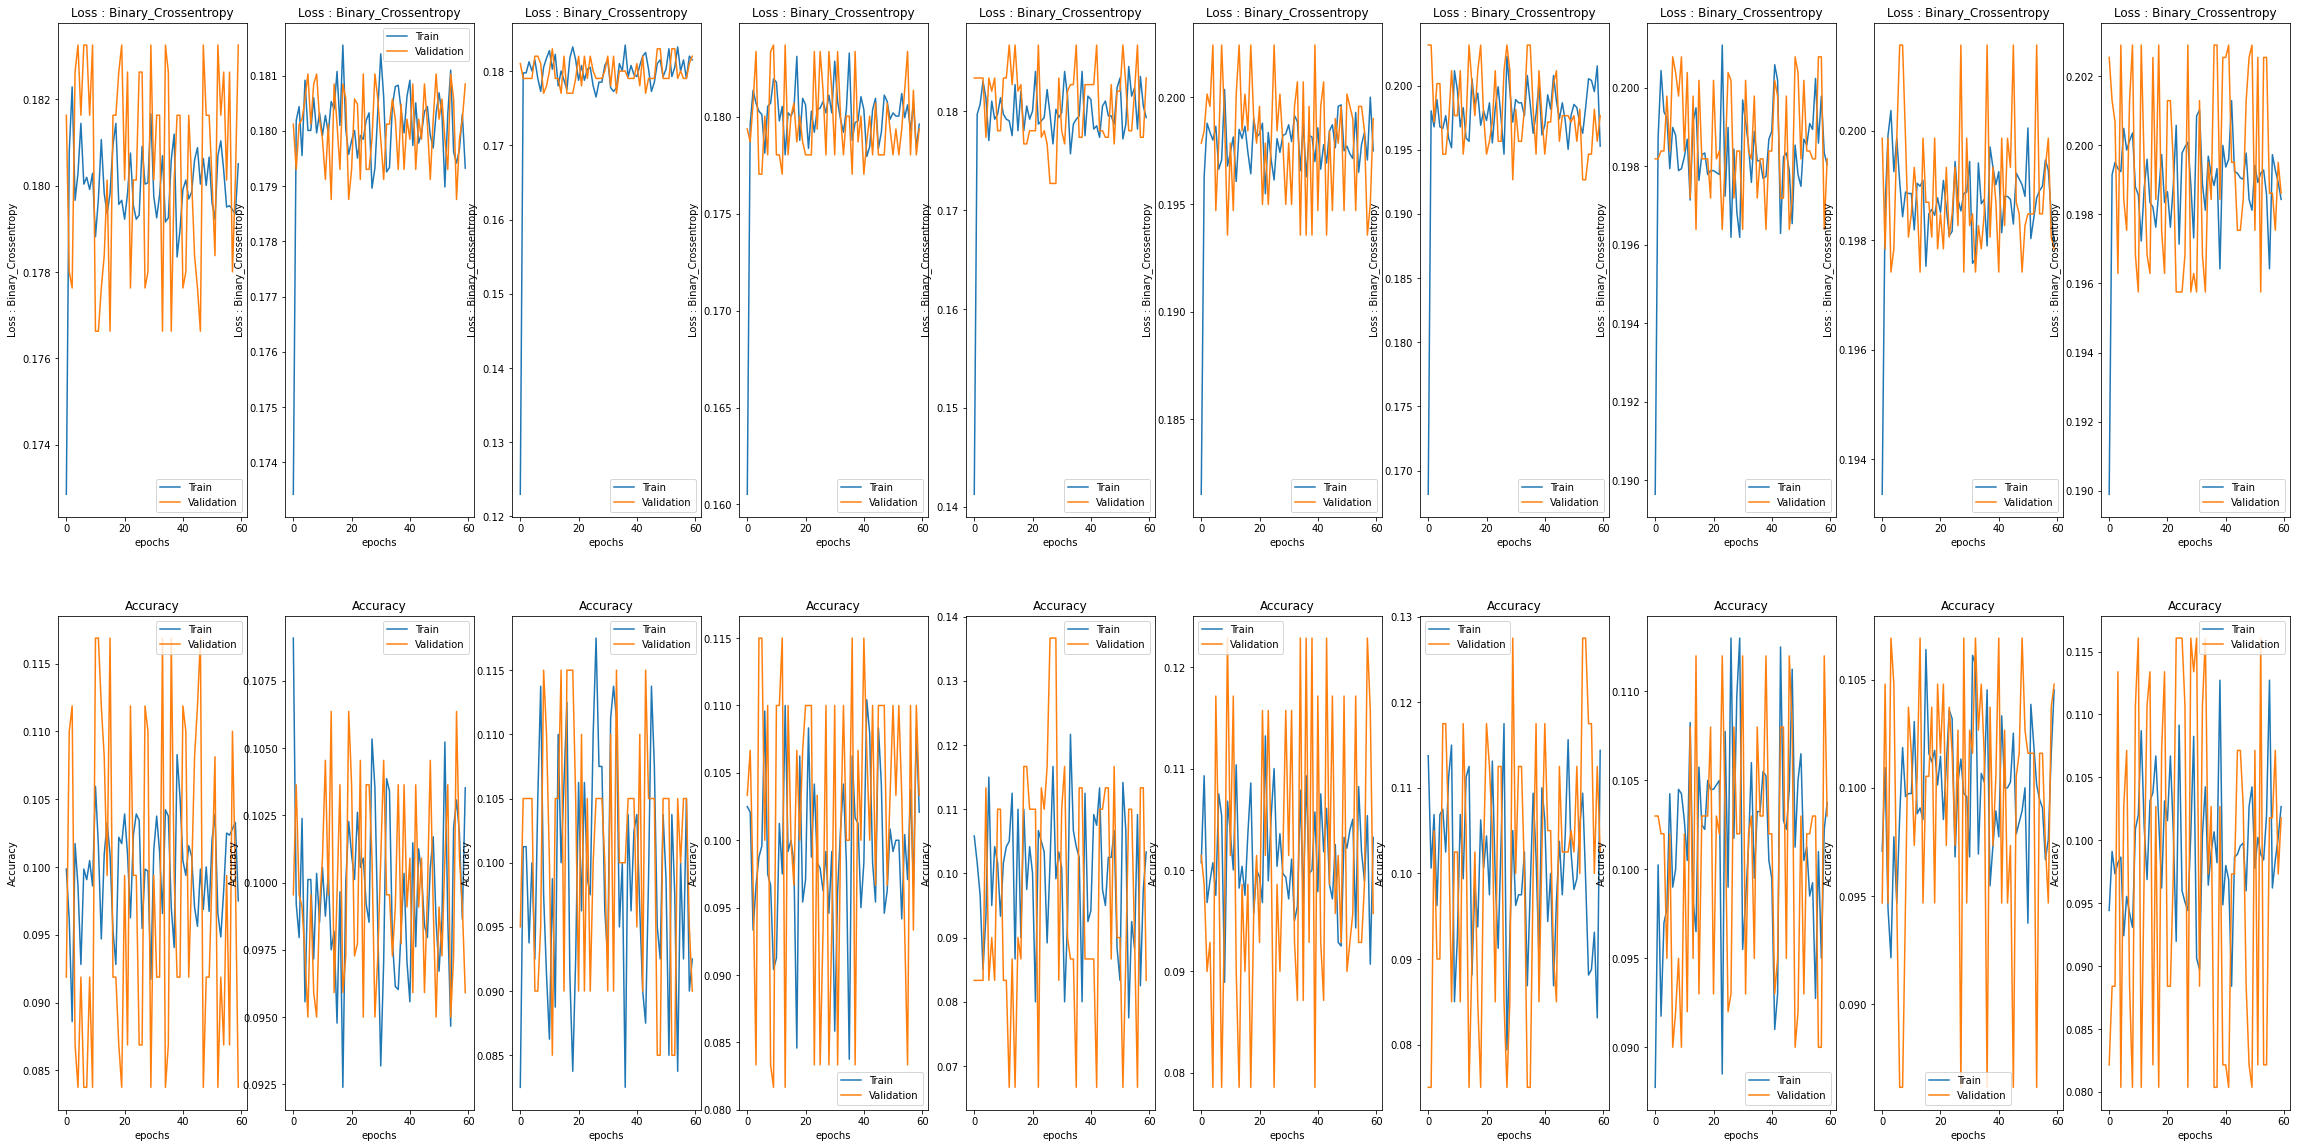

313/313 [==============================] - 9s 27ms/step - loss: 0.1800 - accuracy: 0.1000
0.18000508844852448
0.10000000149011612
313/313 [==============================] - 9s 27ms/step - loss: 0.1800 - accuracy: 0.1000
0.18002913892269135
0.10000000149011612
313/313 [==============================] - 9s 27ms/step - loss: 0.1800 - accuracy: 0.1000
0.18003255128860474
0.10000000149011612
313/313 [==============================] - 9s 27ms/step - loss: 0.1800 - accuracy: 0.1000
0.18004095554351807
0.10000000149011612
313/313 [==============================] - 9s 27ms/step - loss: 0.1800 - accuracy: 0.1000
0.18004125356674194
0.10000000149011612
313/313 [==============================] - 9s 27ms/step - loss: 0.1981 - accuracy: 0.1000
0.19814549386501312
0.10000000149011612
313/313 [==============================] - 9s 28ms/step - loss: 0.1982 - accuracy: 0.1000
0.19815519452095032
0.10000000149011612
313/313 [==============================] - 8s 27ms/step - loss: 0.1988 - accuracy: 0.1000


In [ ]:
f = plt.figure()
f.set_figwidth(20/.5)
f.set_figheight(10/.5)
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.plot(loss3[i])
  plt.plot(loss_val3[i])
  plt.xlabel('epochs')
  plt.ylabel('Loss : Binary_Crossentropy')
  plt.title('Loss : Binary_Crossentropy')
  plt.legend(['Train', 'Validation'])
  plt.subplot(2,10,i+11)
  plt.plot(acc3[i])
  plt.plot(acc_val3[i])
  plt.xlabel('epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Train', 'Validation'])
plt.show()
for i in range(10):
  test_loss,test_accuracy = model3[i].evaluate(x_test,y_test)
  print(test_loss)
  print(test_accuracy)

In [25]:
for i in range(10):
  def my_loss_fn(y_true, y_pred):
    y=np.array([])
    for i in range(10):
      x=(np.array([1/4]))*np.square(np.array(w[i]).reshape([w[i].size])-np.array(a[i][i]).reshape([w[i].size]))
      y=np.concatenate((y, x))
    z=np.zeros([10])
    z[0]=y.mean()
    squared_difference = tf.square(y_true - y_pred)+ torch.Tensor(z)
    #print(tf.square(y_true - y_pred)+ torch.Tensor(z))
    return tf.reduce_mean(squared_difference, axis=-1)  # Note the `axis=-1`
  optimizer = keras.optimizers.Adam(learning_rate=0.05)
  model3[i].compile(loss=my_loss_fn,
                optimizer=optimizer,
                metrics=['accuracy'])

In [26]:
loss3=np.zeros([10,60])
loss_val3=np.zeros([10,60])
acc3=np.zeros([10,60])
acc_val3=np.zeros([10,60])
a=[0,0,0,0,0,0,0,0,0,0]
for i in range(10):
  a[i]=model3[i].get_weights()
n=-1
w = avg_w_co(a,XXX,n) 
for i in range(10):
  import datetime as dt
  t0_relu = dt.datetime.now() 
  train_model3 = model3[i].fit(XXX[i],YYY[i],epochs=1, validation_split=0.2,batch_size=512)
  loss3[i,0]=np.array(train_model3.history['loss'])
  loss_val3[i,0]=np.array(train_model3.history['val_loss'])
  acc3[i,0]=np.array(train_model3.history['accuracy'])
  acc_val3[i,0]=np.array(train_model3.history['val_accuracy'])
  a[i]=model3[i].get_weights()
  t1_relu = dt.datetime.now()
  print(t1_relu-t0_relu)
for n in range(59):
  w = avg_w_co(a,XXX,n)
  for i in range(10):
    model3[i].set_weights(w)
    t0_relu = dt.datetime.now()
    train_model3 = model3[i].fit(XXX[i],YYY[i],epochs=1, validation_split=0.2,batch_size=512)
    loss3[i,n+1]=np.array(train_model3.history['loss'])
    loss_val3[i,n+1]=np.array(train_model3.history['val_loss'])
    acc3[i,n+1]=np.array(train_model3.history['accuracy'])
    acc_val3[i,n+1]=np.array(train_model3.history['val_accuracy'])
    a[i]=model3[i].get_weights()
    t1_relu = dt.datetime.now()
    print(t1_relu-t0_relu)

<ipython-input-12-03286fc1d18e>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w=np.zeros(np.array(a[0]).shape)
<ipython-input-12-03286fc1d18e>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w= w+(wi)*np.array(a[i])


0 
 _________________________
13/13 [==============================] - 15s 1s/step - loss: 0.1726 - accuracy: 0.1014 - val_loss: 0.1816 - val_accuracy: 0.0919
0:00:21.389393
18/18 [==============================] - 21s 1s/step - loss: 0.0982 - accuracy: 0.0968 - val_loss: 0.0901 - val_accuracy: 0.0977
0:00:21.376307
2/2 [==============================] - 3s 1s/step - loss: 0.1221 - accuracy: 0.1100 - val_loss: 0.1790 - val_accuracy: 0.1050
0:00:03.469419
5/5 [==============================] - 6s 1s/step - loss: 0.1609 - accuracy: 0.1213 - val_loss: 0.1787 - val_accuracy: 0.1067
0:00:11.072373
3/3 [==============================] - 4s 860ms/step - loss: 0.1417 - accuracy: 0.1333 - val_loss: 0.1727 - val_accuracy: 0.1367
0:00:03.693142
6/6 [==============================] - 7s 1s/step - loss: 0.1080 - accuracy: 0.1046 - val_loss: 0.0907 - val_accuracy: 0.1171
0:00:06.908061
4/4 [==============================] - 54s 881ms/step - loss: 0.1508 - accuracy: 0.1381 - val_loss: 0.1790 - val_ac

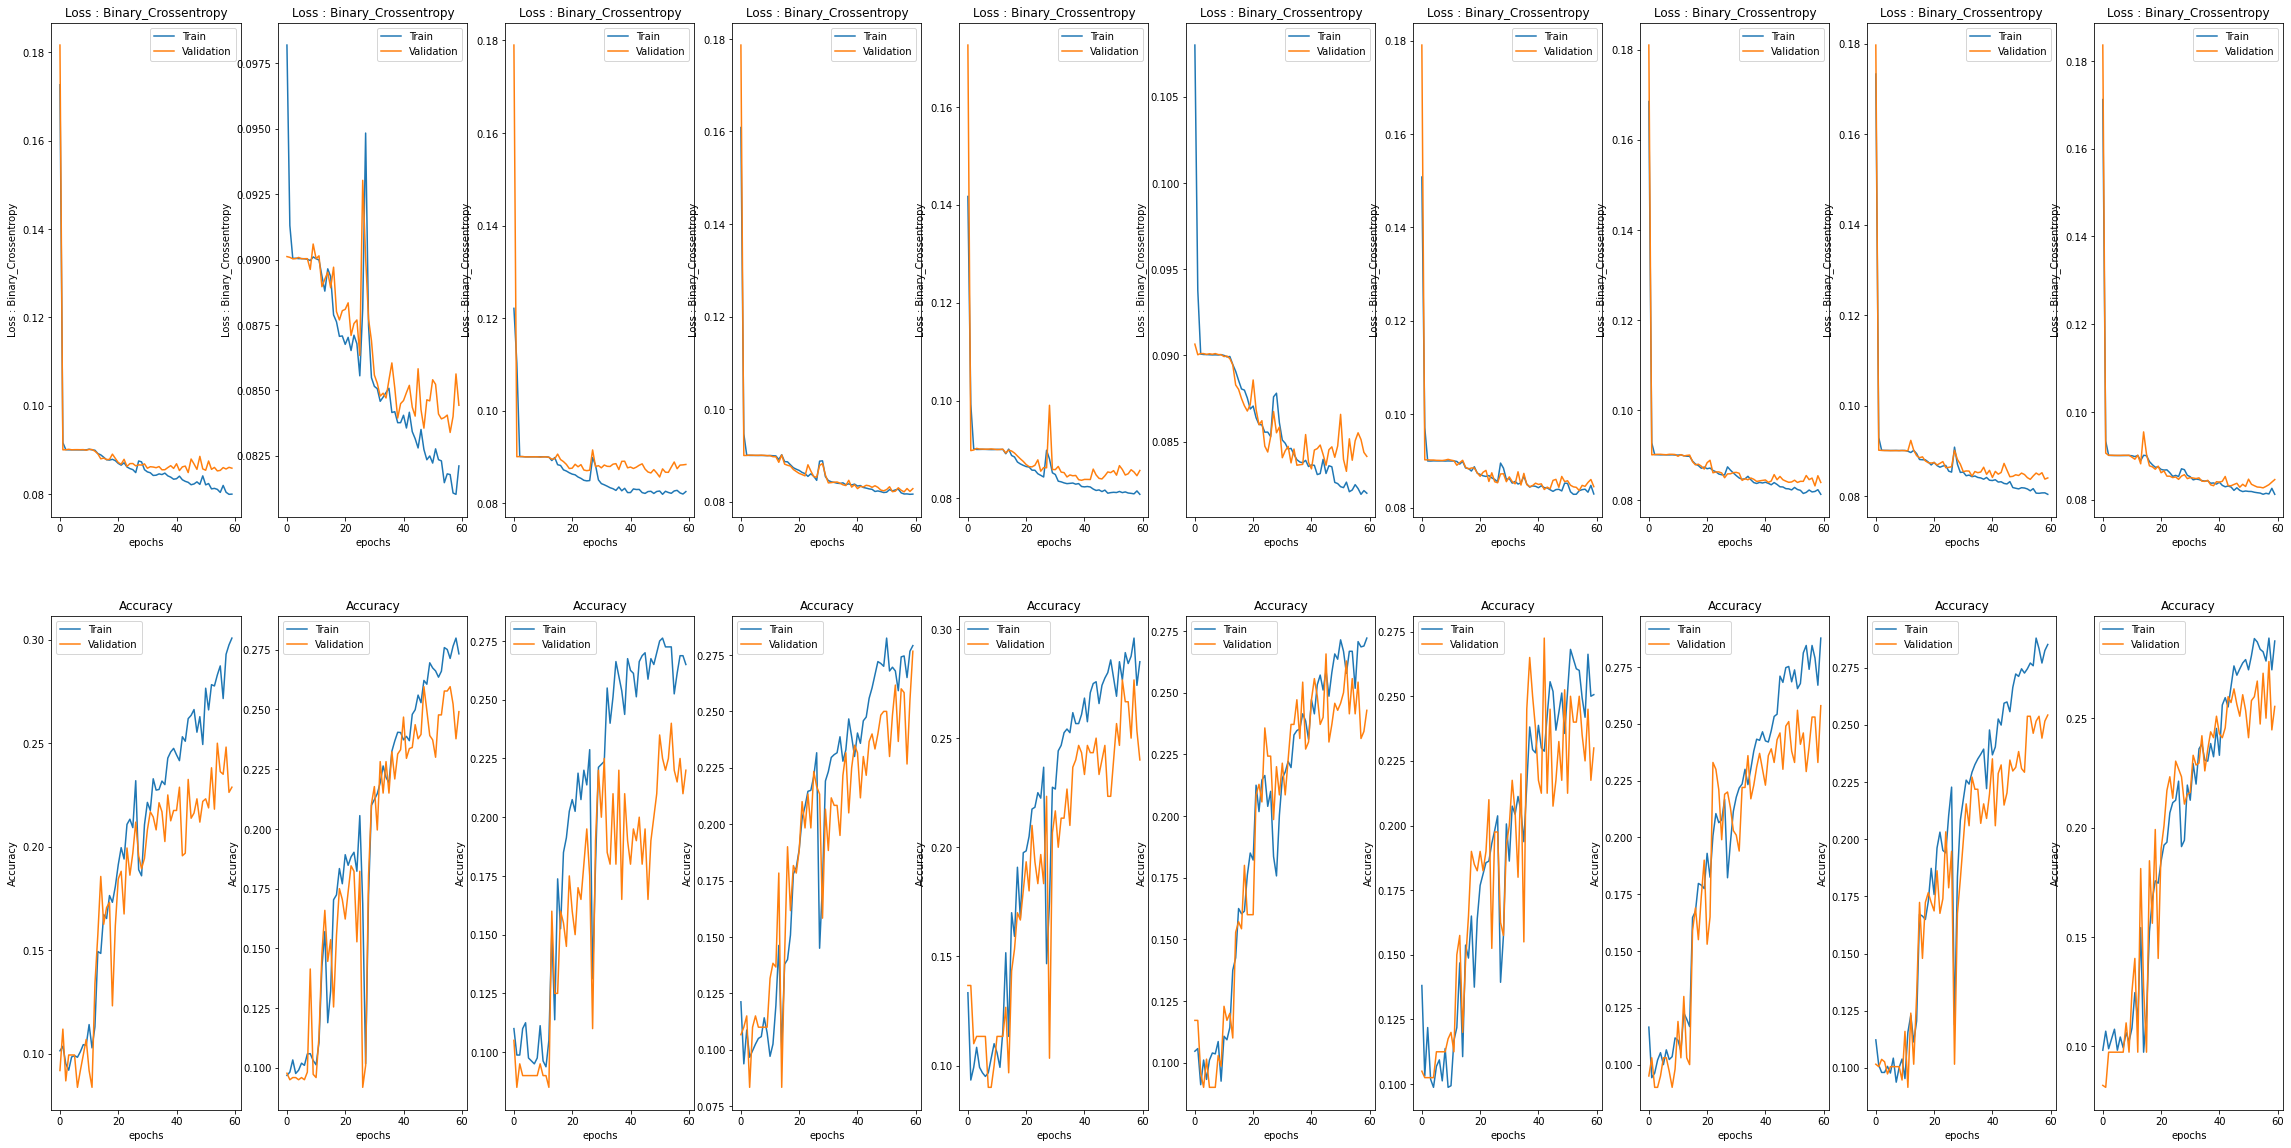

313/313 [==============================] - 8s 26ms/step - loss: 0.0845 - accuracy: 0.2621
0.0845029354095459
0.2621000111103058
313/313 [==============================] - 8s 26ms/step - loss: 0.0844 - accuracy: 0.2513
0.08442818373441696
0.25130000710487366
313/313 [==============================] - 8s 26ms/step - loss: 0.0845 - accuracy: 0.2497
0.08450096845626831
0.24969999492168427
313/313 [==============================] - 8s 25ms/step - loss: 0.0844 - accuracy: 0.2674
0.08436383306980133
0.26739999651908875
313/313 [==============================] - 8s 26ms/step - loss: 0.0850 - accuracy: 0.2513
0.08501003682613373
0.25130000710487366
313/313 [==============================] - 8s 26ms/step - loss: 0.0837 - accuracy: 0.2583
0.08369376510381699
0.2583000063896179
313/313 [==============================] - 8s 26ms/step - loss: 0.0840 - accuracy: 0.2486
0.08398457616567612
0.24860000610351562
313/313 [==============================] - 8s 26ms/step - loss: 0.0843 - accuracy: 0.2537
0.0

In [27]:
f = plt.figure()
f.set_figwidth(20/.5)
f.set_figheight(10/.5)
for i in range(10):
  plt.subplot(2,10,i+1)
  plt.plot(loss3[i])
  plt.plot(loss_val3[i])
  plt.xlabel('epochs')
  plt.ylabel('Loss : Binary_Crossentropy')
  plt.title('Loss : Binary_Crossentropy')
  plt.legend(['Train', 'Validation'])
  plt.subplot(2,10,i+11)
  plt.plot(acc3[i])
  plt.plot(acc_val3[i])
  plt.xlabel('epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy')
  plt.legend(['Train', 'Validation'])
plt.show()
for i in range(10):
  test_loss,test_accuracy = model3[i].evaluate(x_test,y_test)
  print(test_loss)
  print(test_accuracy)